## Sentiment Analysis on Reviews 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding



In [79]:
amazondata = []
with open("./Amazon_Data.txt") as f: 
    for line in f: 
        line = line.replace("__label__2 ", "positive\t")
        line = line.replace("__label__1 ", "negative\t")
        amazondata.append(line.split("\t"))
       
review_df = pd.DataFrame(amazondata)
review_df.columns = ["sentiment", 'text']

#df.head
review_df = review_df.sample(frac=1, random_state=1)

# test data
test_review_df = review_df[10000:20000]

# train and validation data
review_df = review_df[:10000]
print(review_df.shape)
print(test_review_df.shape)


# test data
review_df.head()
review_df['sentiment'].value_counts()
sentiment_label = review_df.sentiment.factorize()
sentiment_label
review = review_df.text.values
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(review)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(review)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)




(10000, 2)
(10000, 2)


In [77]:
#process movie data
moviedata = []
with open("./Rateitall_Data.txt") as f: 
    for line in f: 
        moviedata.append(line.split("\t"))
        # re.sub(r"__label_2 ", "positive\t", line)
        # re.sub(r"__label__1", "negative\t", line)
        #break
        
movie_df = pd.DataFrame(moviedata)
movie_df.columns = ["sentiment", 'text']
movie_df = movie_df.sample(frac=1, random_state=1)

test_movie_df = movie_df[10000:]
movie_df = movie_df[:10000]

print(movie_df.shape)
print(test_movie_df.shape)

movie_df.head()
movie_df['sentiment'].value_counts()
sentiment_label = movie_df.sentiment.factorize()
sentiment_label
movie = movie_df.text.values
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(movie)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(movie)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

(10000, 2)
(3864, 2)


In [2]:
#process twitter data
df = pd.read_csv("./Tweet_Data.csv")
df.head()
df.columns
tweet_df = df[['text','airline_sentiment']]
tweet_df.head(5)
tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral']
tweet_df.head(5)
tweet_df = tweet_df.sample(frac=1, random_state=1)
test_tweet_df = tweet_df[10000:]
tweet_df = tweet_df[:10000]
print(tweet_df.shape)
print(test_tweet_df.shape)
tweet_df["airline_sentiment"].value_counts()
sentiment_label = tweet_df.airline_sentiment.factorize()
sentiment_label

tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

print(tweet_df.head())

(10000, 2)
(1541, 2)
                                                    text airline_sentiment
11560  @USAirways u guys get too much $$$ and too man...          negative
3512   @united ...she said she would need to get a su...          negative
5742   @southwestair SWEET!!! Glad to hear it. I'll k...          positive
905    @united has made my no fly list. Other airline...          negative
5878   @SouthwestAir CEO Gary Kelly, "We are America'...          positive


In [89]:
#process reddit data
df = pd.read_csv("./Reddit_Data.csv")
df.head()
df.columns
reddit_df = df[['clean_comment','category']]
# print(reddit_df.shape)
reddit_df.head(5)
reddit_df = reddit_df[reddit_df['category'] != 0]

reddit_df = reddit_df.sample(frac=1, random_state=1)
test_reddit_df = reddit_df[10000:20000]
reddit_df = reddit_df[:10000]
print(reddit_df.shape)
print(test_reddit_df.shape)
reddit_df.head(5)
reddit_df["category"].value_counts()
sentiment_label = reddit_df.category.factorize()
sentiment_label

reddit_df["category"].replace(to_replace=1, value="positive", inplace=True)
reddit_df["category"].replace(to_replace=-1, value="negative", inplace=True)


reddit = reddit_df.clean_comment.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(reddit)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(reddit)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

print(reddit_df.head())

(10000, 2)
(10000, 2)
                                           clean_comment  category
31040                                 pay keep news free  positive
24364                                   thanks for this   positive
6004    whether agree with them not and even like not...  positive
11855  absolutely correct although hope doesn moderat...  positive
251    man the players seem really high strung today ...  positive


In [3]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           390432    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 407,083
Trainable params: 407,083
Non-trainable params: 0
__________________________________________________

In [4]:
with tf.device('/cpu:0'):
    history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5


2023-04-30 13:12:27.289357: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


250/250 [==============================] - 24s 91ms/step - loss: 0.3912 - accuracy: 0.8399 - val_loss: 0.2821 - val_accuracy: 0.8850
Epoch 2/5
250/250 [==============================] - 22s 89ms/step - loss: 0.2172 - accuracy: 0.9181 - val_loss: 0.2294 - val_accuracy: 0.9100
Epoch 3/5
250/250 [==============================] - 22s 88ms/step - loss: 0.1534 - accuracy: 0.9406 - val_loss: 0.2200 - val_accuracy: 0.9160
Epoch 4/5
250/250 [==============================] - 22s 88ms/step - loss: 0.1286 - accuracy: 0.9514 - val_loss: 0.2211 - val_accuracy: 0.9175
Epoch 5/5
250/250 [==============================] - 22s 88ms/step - loss: 0.1052 - accuracy: 0.9614 - val_loss: 0.2289 - val_accuracy: 0.9180


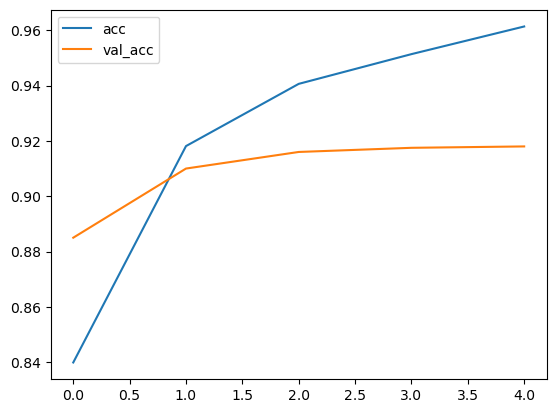

<Figure size 640x480 with 0 Axes>

In [5]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Amazon Review Accuracy plot.jpg")

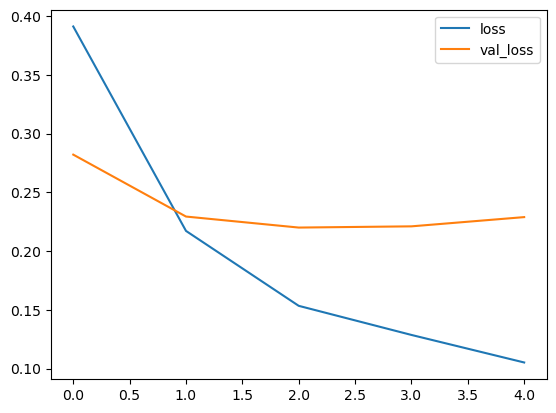

<Figure size 640x480 with 0 Axes>

In [6]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Amazon Review Loss plot.jpg")

In [7]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])
    return sentiment_label[1][prediction]

In [ ]:
def predict_sentiment(text, model):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [8]:
tweet_df_edit = test_tweet_df['text'].apply(predict_sentiment)

1/1 [==============================] - 0s 149ms/step
Predicted label:  negative
1/1 [==============================] - 0s 20ms/step
Predicted label:  negative
1/1 [==============================] - 0s 19ms/step
Predicted label:  negative
1/1 [==============================] - 0s 18ms/step
Predicted label:  positive
1/1 [==============================] - 0s 20ms/step
Predicted label:  negative
1/1 [==============================] - 0s 20ms/step
Predicted label:  negative
1/1 [==============================] - 0s 19ms/step
Predicted label:  negative
1/1 [==============================] - 0s 22ms/step
Predicted label:  negative
1/1 [==============================] - 0s 18ms/step
Predicted label:  negative
1/1 [==============================] - 0s 18ms/step
Predicted label:  negative
1/1 [==============================] - 0s 18ms/step
Predicted label:  negative
1/1 [==============================] - 0s 19ms/step
Predicted label:  negative
1/1 [==============================] - 0s 17ms/step

In [12]:
print(test_tweet_df)
print(tweet_df_edit)

                                                    text airline_sentiment
5980   @SouthwestAir having trouble reFlight Booking ...          negative
624    @united how do I get my account number if your...          negative
3248   @united Lost my wallet on flight 1007 yesterda...          negative
4378   @SouthwestAir I agree! RT @9NEWS: One airline ...          positive
5384   @SouthwestAir my flight is Cancelled Flightled...          negative
...                                                  ...               ...
10240  @USAirways - what a disaster! Flight 3739, mis...          negative
13963  @AmericanAir I fortunately was not on that fli...          positive
1199   @united JH, thanks so much for reaching out. I...          negative
6719   @SouthwestAir Hi-My flight (BNA to LGA) was Ca...          negative
349    @VirginAmerica It's fine. Already done with my...          negative

[1541 rows x 2 columns]
5980     negative
624      negative
3248     negative
4378     positive
538

In [9]:
test_sentence1 = "Still waiting on bags from flight 1613/2440 yesterday  First Class passenger not happy with your service."
predict_sentiment(test_sentence1)

test_sentence2 = "So excited for my first cross country flight LAX to MCO I've heard nothing but great things about Virgin America."
predict_sentiment(test_sentence2)

2023-04-29 10:55:59.762296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Predicted label:  negative
1/1 [==============================] - 1s 1s/step
Predicted label:  positive
